## Clustering project

The aims of this notebook: -

1.   Explore sklearn - A popular python package that is used to build ML models
2.   Explore iris dataset
3.   Use supervised learning algorithm (KNN) to classify
4.   Use unsupervised learning algorithm (Kmeans) to do clustering


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets 

In [ ]:
iris = datasets.load_iris()

In [ ]:
#check out what is there is iris
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
# Check out the datatype of iris 
type(iris)

sklearn.utils.Bunch

The "iris" object has two main attributes


1.   data    : Features 
2.   target  : class labels



In [ ]:
iris_features = iris.data
iris_label = iris.target

In [ ]:
# Find the dimensions of iris_features
iris_features.shape

(150, 4)

In [ ]:
# Find the type of iris_features
type(iris_features)

numpy.ndarray

In [ ]:
iris_features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**Explore Data**

In [ ]:
import pandas as pd
iris_features_df = pd.DataFrame(iris_features, columns = iris.feature_names)

In [ ]:
# Look at the top 2 rows of the dataframe
iris_features_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# look at the bottom 5 rows of the dataframe
iris_features_df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
#Import a package the helps visualizing the data
import seaborn as sns

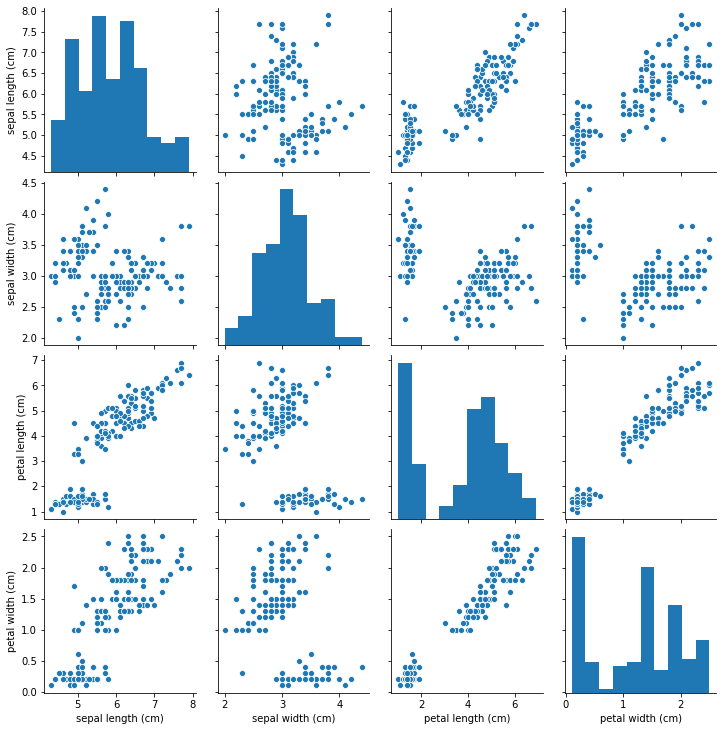

In [ ]:
# pairplot : plot relationship between different columns
sns.pairplot(iris_features_df);

In [ ]:
# Adding the target column to the dataframe
iris_features_df['species_class'] = iris_label

In [ ]:
#check the dataset
iris_features_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


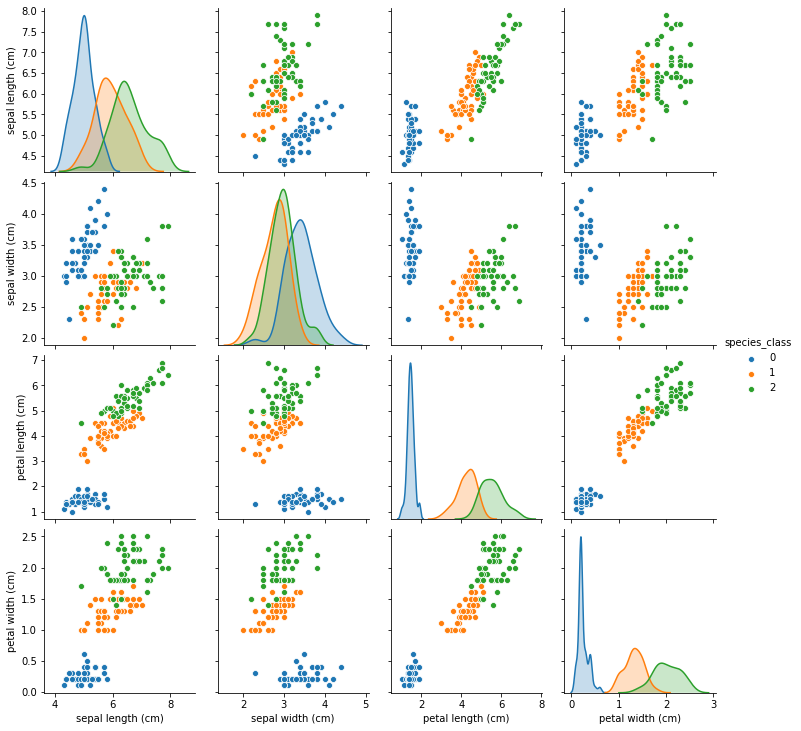

In [ ]:
sns.pairplot(iris_features_df, hue = 'species_class');

### Supervised learning using KNearestNeighbourClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(iris_features,iris_label,test_size=.25,random_state=100)

In [ ]:
# Check the shape of train set
x_train.shape

(112, 4)

In [ ]:
# Check the shape of test set
x_test.shape

(38, 4)

In [ ]:
# check y_train
y_train

array([2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       0, 0])

In [ ]:
# check y_test
y_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1])

In [ ]:
#from sklearn import tree
#classifier=tree.DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Training the model
classifier.fit(x_train,y_train);

In [ ]:
#prediction for your training dataset
prediction_trainset = classifier.predict(x_train)

In [ ]:
#prediction for testing dataset
prediction_testset=classifier.predict(x_test)

In [ ]:
# check prediction on test set
prediction_testset

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Training Accuracy
print(accuracy_score(y_train,prediction_trainset))

0.9821428571428571


In [ ]:
#Testing Accuracy
print(accuracy_score(y_test,prediction_testset)) #38

0.9736842105263158


In [ ]:
classifier_8 = KNeighborsClassifier(n_neighbors=8)

In [ ]:
classifier_8.fit(x_train,y_train);

In [ ]:
predictions_8=classifier_8.predict(x_test)

In [ ]:
print(accuracy_score(y_test,predictions_8))

0.9736842105263158


### UnSupervised learning using Kmeans clustering

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

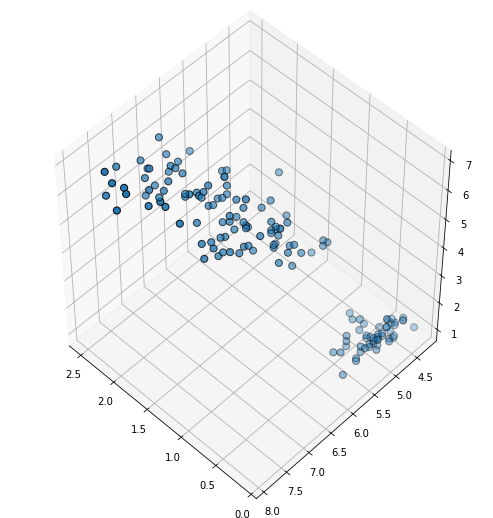

In [ ]:
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(iris_features[:, 3], iris_features[:, 0], iris_features[:, 2],edgecolor="k", s=50)

In [ ]:
from sklearn.cluster import KMeans

#KMeans
km = KMeans(n_clusters=3)
km.fit(iris_features)
km.predict(iris_features)
labels = km.labels_

In [ ]:
#check the labels
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Text(0.5, 0.92, 'K Means')

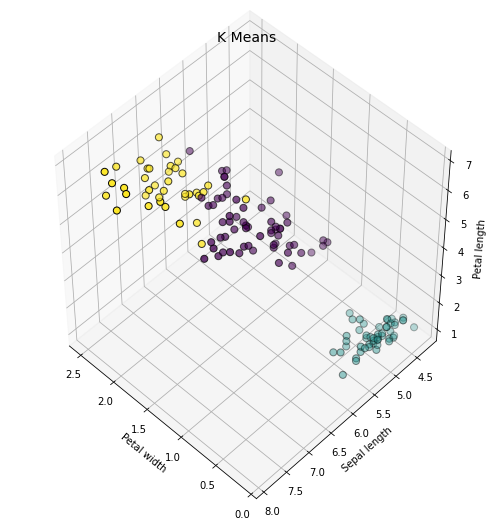

In [ ]:
import numpy as np
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(iris_features[:, 3], iris_features[:, 0], iris_features[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

**UnSupervised learning using DBSCAN clustering**

https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()
dbscan.fit(iris_features);

In [ ]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
iris_features_df['species_cluster'] = dbscan.labels_

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


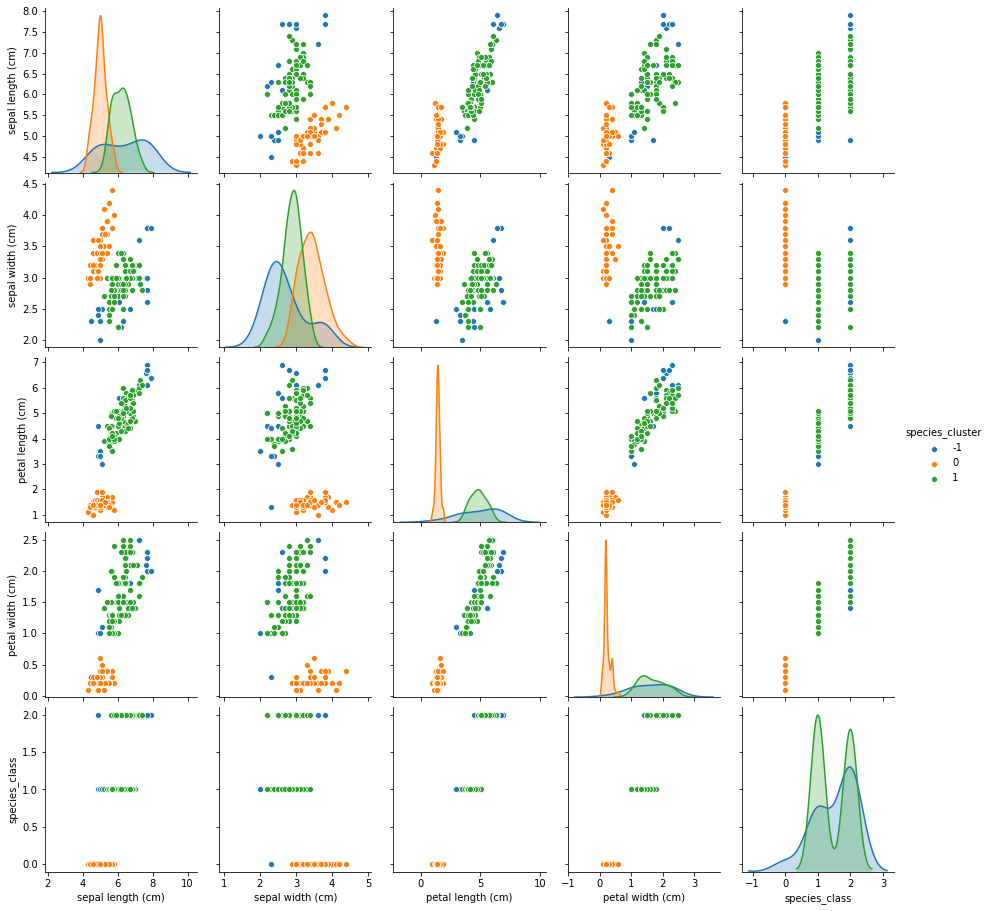

In [ ]:
sns.pairplot(iris_features_df, hue='species_cluster')